# Spambase

In [1]:
from sklearn.datasets import fetch_openml
spambase = fetch_openml('spambase', version=1, as_frame=True)
df = spambase.frame

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
df_x = df.drop('class', axis=1)

In [3]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [5]:
df_x.shape

(4601, 57)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9131378935939196

In [10]:
dt.tree_.max_depth

26

In [11]:
depths = [i for i in range(1, 26)]
acurracies = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    acurracies.append(dt_accuracy)



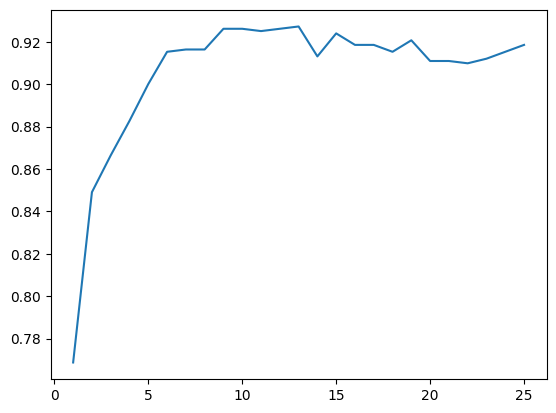

In [12]:
import matplotlib.pyplot as plt

plt.plot(depths, acurracies)

In [14]:
import numpy as np

np_accu = np.array(acurracies)
np.argmax(np_accu)

12

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9250814332247557

In [17]:
#Top 30 important features
top30 = dt.feature_importances_
top30[np.argsort(top30)[::-1]][:30]

array([0.36741431, 0.17612521, 0.09379165, 0.05546544, 0.04893993,
       0.03261087, 0.02680625, 0.02592844, 0.01900912, 0.01459193,
       0.01384796, 0.01337262, 0.00884955, 0.00881272, 0.00787665,
       0.00698443, 0.00676418, 0.00583499, 0.00544865, 0.00523084,
       0.00473418, 0.00459218, 0.0043444 , 0.00415573, 0.00388109,
       0.00379399, 0.00270244, 0.00259567, 0.00245717, 0.00234827])

In [18]:
features = np.array(df.columns)
features[np.argsort(top30)[::-1]][:30]

array(['char_freq_%24', 'word_freq_remove', 'char_freq_%21',
       'word_freq_hp', 'capital_run_length_average', 'word_freq_free',
       'capital_run_length_longest', 'word_freq_george', 'word_freq_edu',
       'word_freq_our', 'word_freq_business', 'capital_run_length_total',
       'word_freq_you', 'word_freq_money', 'word_freq_85',
       'word_freq_email', 'word_freq_internet', 'word_freq_will',
       'word_freq_receive', 'word_freq_order', 'word_freq_pm',
       'word_freq_people', 'char_freq_%3B', 'word_freq_your',
       'word_freq_technology', 'word_freq_re', 'word_freq_hpl',
       'word_freq_meeting', 'word_freq_report', 'word_freq_original'],
      dtype=object)

## L2-reg Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.9196525515743756

In [83]:
coefficients = lr.coef_
len(features[np.argsort(np.abs(coefficients))[::-1][:30]]

1

In [86]:
features[np.argsort(np.mean(np.abs(coefficients), axis=0))[::-1][:30]]

array(['word_freq_george', 'word_freq_hp', 'word_freq_cs',
       'word_freq_project', 'word_freq_meeting', 'word_freq_edu',
       'char_freq_%24', 'word_freq_conference', 'word_freq_lab',
       'word_freq_000', 'word_freq_remove', 'char_freq_%23',
       'word_freq_hpl', 'word_freq_free', 'capital_run_length_longest',
       'word_freq_3d', 'word_freq_85', 'word_freq_re', 'word_freq_data',
       'capital_run_length_total', 'word_freq_credit', 'word_freq_telnet',
       'word_freq_technology', 'word_freq_business',
       'word_freq_addresses', 'word_freq_our', 'word_freq_pm',
       'word_freq_labs', 'char_freq_%3B', 'word_freq_your'], dtype=object)

# MNIST

In [19]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# mnist = mnist.data

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
mnist_x = mnist.data
mnist_y = mnist.target

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mnist_x = scaler.fit_transform(mnist_x)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, random_state=42)

## DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.8717857142857143

In [24]:
dt.tree_.max_depth

41

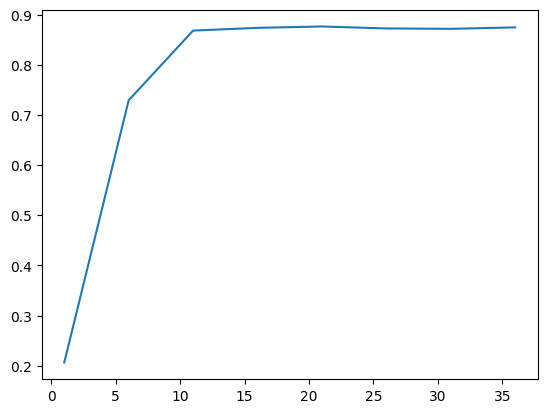

In [25]:
depths = [i for i in range(1, 40, 5)]
acurracies = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    acurracies.append(dt_accuracy)

plt.plot(depths, acurracies)

In [29]:
acurracies

[0.20635714285714285,
 0.7295,
 0.8685714285714285,
 0.8740714285714286,
 0.8767857142857143,
 0.8728571428571429,
 0.8720714285714286,
 0.875]

In [30]:
depths

[1, 6, 11, 16, 21, 26, 31, 36]

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=21)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.8727857142857143

In [35]:
mnist_x.shape

(70000, 784)

In [37]:
#Top 30 important features
top30 = dt.feature_importances_
top30[np.argsort(top30)[::-1]][:30]
np.argsort(top30)[::-1][:30]

array([489, 435, 350, 347, 542, 211, 486, 432, 270, 597, 155, 354, 273,
       206, 290, 296, 405, 656, 657, 352, 596, 404, 658, 372, 297, 380,
       267, 457, 490, 598])

## L2-reg Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9162142857142858

In [39]:
coefficients = lr.coef_
np.argsort(np.mean(np.abs(coefficients), axis=0))[::-1][:30]

array([360, 565, 248,  97, 465, 323, 332, 379, 554, 444, 542, 580, 377,
       434, 276, 330, 572, 204, 399,  96, 304, 442,  70, 145, 322, 267,
       326, 318, 240, 435])

# 20 Ng

In [22]:
def read_20ng_and_convert(file_path = '20ng.csv'):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd
    import numpy as np

    df = pd.read_csv(file_path)
    df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)
    classes = ["alt.atheism", "sci.med", "sci.electronics", "comp.graphics", "talk.politics.guns", "sci.crypt"]
    df = df[df['index'].isin(classes)]
    vectorizer = TfidfVectorizer(use_idf=False)
    # vectorizer = TfidfVectorizer(use_idf=False)
    sparse_matrix = vectorizer.fit_transform(df['content'])
    sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=vectorizer.get_feature_names_out())
    sparse_df_mean = sparse_df.mean(axis=0)
    sparse_std_sub = sparse_df.sparse.to_dense().std(axis=0)
    sparse_df = (sparse_df - sparse_df_mean)/sparse_std_sub
    sparse_df['index'] = df['index'].to_numpy()
    return sparse_df

In [23]:
df_20ng = read_20ng_and_convert()

In [4]:
df_20ng_x = df_20ng.drop('index', axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

df_20ng_x = df_20ng_x.to_numpy()
scaler = StandardScaler()
df_x = scaler.fit_transform(df_20ng_x)

In [7]:
y = df_20ng['index']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9966666666666667

In [21]:
dt.tree_.max_depth

11

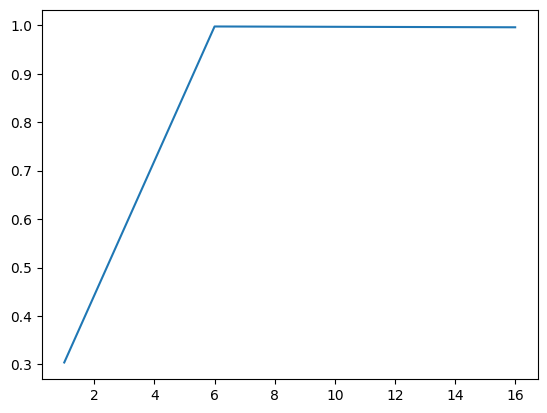

In [11]:
import matplotlib.pyplot as plt

depths = [i for i in range(1, 21, 5)]
acurracies = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    acurracies.append(dt_accuracy)

plt.plot(depths, acurracies)


In [12]:
acurracies

[0.30416666666666664, 0.9975, 0.9966666666666667, 0.9958333333333333]

In [13]:
#Top 30 important features
top30 = dt.feature_importances_
top30[np.argsort(top30)[::-1]][:30]

array([2.04743063e-01, 1.97512222e-01, 1.95909072e-01, 1.94321765e-01,
       1.90486979e-01, 5.20994222e-03, 4.24813813e-03, 4.17582432e-03,
       9.98843014e-04, 7.80255349e-04, 5.00028489e-04, 5.00023614e-04,
       2.52860530e-04, 2.49725059e-04, 1.11258633e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [15]:
features = np.array(df_20ng.columns)
features[np.argsort(top30)[::-1]][:30]

array(['crypt', 'guns', 'atheism', 'meclomen', 'electronics', 'graphics',
       'schwimmer', 'politicians', 'vowed', 'xrcjd', 'bst', 'aquarius',
       'vdu8g', 'understates', 'thirty', 'blix', 'blkbox', 'blkhole',
       'bllac', 'ťrale', 'bloating', 'blitter', 'blobs', 'bloc', 'bloch',
       'block', 'block_read', 'blitz', 'blissfully', 'blits'],
      dtype=object)

## L2-reg Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975

In [19]:
coefficients = lr.coef_

6

In [20]:
features[np.argsort(np.mean(np.abs(coefficients), axis=0))[::-1][:30]]

array(['electronics', 'meclomen', 'crypt', 'graphics', 'schwimmer',
       'guns', 'atheism', 'politicians', 'comp', 'clipper', 'talionis',
       'encryption', 'kewe', 'securing', 'gun', 'government', 'chip',
       'pritikin', 'eff', 'alt', 'crypto', 'god', 'wacky', 'religeous',
       'keyrings', 'thankfully', 'doctor', 'atheists', 'files', 'gif'],
      dtype=object)